# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [3]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [4]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/johanna/Documents/Parsons/ML/ml-master/moviereviews_train.tsv', my_random_seed=19)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [5]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

/Users/johanna/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


{'Pos': 9964, 'Neg': 10036, 'TP': 4915, 'TN': 5157, 'FP': 4879, 'FN': 5049, 'Accuracy': 0.5036, 'Precision': 0.5018378599142332, 'Recall': 0.4932757928542754, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [6]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=0.0001)
svm.fit(X_train, y_train)

svm_performance_train_1 = BinaryClassificationPerformance(svm.predict(X_train), y_train, '0.0001')
svm_performance_train_1.compute_measures()
print(svm_performance_train_1.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 9964, 'TN': 10036, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': '0.0001'}


In [7]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=0.1)
svm.fit(X_train, y_train)

svm_performance_train_2 = BinaryClassificationPerformance(svm.predict(X_train), y_train, '0.1')
svm_performance_train_2.compute_measures()
print(svm_performance_train_2.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 9964, 'TN': 10036, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': '0.1'}


In [8]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=1)
svm.fit(X_train, y_train)

svm_performance_train_3 = BinaryClassificationPerformance(svm.predict(X_train), y_train, '1')
svm_performance_train_3.compute_measures()
print(svm_performance_train_3.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 9918, 'TN': 10005, 'FP': 31, 'FN': 46, 'Accuracy': 0.99615, 'Precision': 0.9968841089556739, 'Recall': 0.995383380168607, 'desc': '1'}


In [9]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=100)
svm.fit(X_train, y_train)

svm_performance_train_4 = BinaryClassificationPerformance(svm.predict(X_train), y_train, '100')
svm_performance_train_4.compute_measures()
print(svm_performance_train_4.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 8530, 'TN': 9839, 'FP': 197, 'FN': 1434, 'Accuracy': 0.91845, 'Precision': 0.977426377907643, 'Recall': 0.8560818948213569, 'desc': '100'}


In [10]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=1000)
svm.fit(X_train, y_train)

svm_performance_train_5 = BinaryClassificationPerformance(svm.predict(X_train), y_train, '1000')
svm_performance_train_5.compute_measures()
print(svm_performance_train_5.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 7394, 'TN': 9971, 'FP': 65, 'FN': 2570, 'Accuracy': 0.86825, 'Precision': 0.9912856951333959, 'Recall': 0.7420714572460859, 'desc': '1000'}


In [18]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=500)
svm.fit(X_train, y_train)

svm_performance_train_6 = BinaryClassificationPerformance(svm.predict(X_train), y_train, '500')
svm_performance_train_6.compute_measures()
print(svm_performance_train_6.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 7783, 'TN': 9941, 'FP': 95, 'FN': 2181, 'Accuracy': 0.8862, 'Precision': 0.987941101802488, 'Recall': 0.7811120032115616, 'desc': '500'}


### MODEL: logistic regression

In [19]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 9964, 'TN': 10036, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 9550, 'TN': 9873, 'FP': 163, 'FN': 414, 'Accuracy': 0.97115, 'Precision': 0.983218367136827, 'Recall': 0.9584504215174628, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [21]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 9964, 'TN': 10036, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [22]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 9964, 'TN': 10036, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 9964, 'Neg': 10036, 'TP': 6994, 'TN': 8166, 'FP': 1870, 'FN': 2970, 'Accuracy': 0.758, 'Precision': 0.7890342960288809, 'Recall': 0.7019269369731032, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

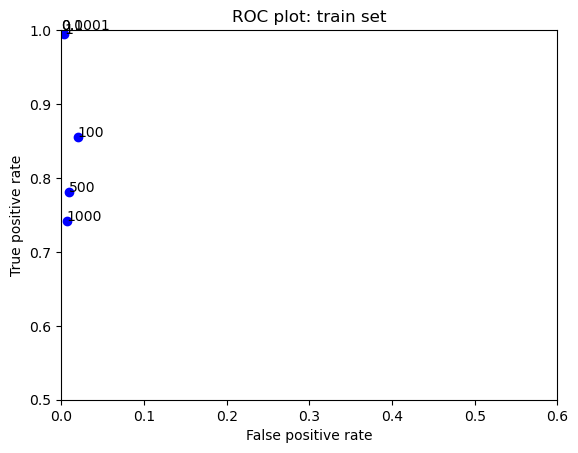

In [35]:
#fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]
fits = [svm_performance_train_1,svm_performance_train_2,svm_performance_train_3,svm_performance_train_4,svm_performance_train_5,svm_performance_train_6]


for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 0.6, 0.5, 1])
plt.title('ROC plot: train set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [115]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [116]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
139
Simply put, this is the worst movie since \Police Academy: Mission to Moscow\" (if you liked that movie you will probably like this one).<br /><br />What were they thinking ? Some ideas should stay just that, an idea. The fact that this idea could itself to film should be a criminal offense.<br /><br />What was so bad about it I hear you ask. One word ... EVERYTHING.<br /><br />Cost to Hire: $4.50 Cost in Time to Watch: 89 Minutes<br /><br />I want a refund on both!"
* * * * * * * * * 
251
My life is about saving animals. I do volunteer work with a cat rescue organization. I am a vegetarian because I couldn't kill an animal even to sustain my life. I can't even kill a spider, I put it outdoors. The scene where the children throw rocks at the bird until it dies, with Sooner participating in an attempt to be accepted by the other children, made me sick and has haunted me ever since. It simply convinces me that human beings are pathetic in their need for a

6008
There are many good things about the new BSG: There's the multiple Cylon roles for Model 8 and 6, for example, which the two actresses played superbly. There's the old school feel of industrial design aboard Galactica (\My ship will not be networked, over my dead body!\") Also, all the space battles, the special effects (even though the seasoned sci-fi watcher will acknowledge the cartoonishness of it all) The darkness of the characters, their essentially flawed nature.<br /><br />That makes it all the more bitter that the ending was so childish.<br /><br />Yes, the first part, the scenes in space, the raid on the Cylons and all that was very good. But the mushy ending? I always watch films and shows these days with the timer hidden, so I never know how much time is left until the end. So for me it was a special kind of torture, to see the end happen over and over again. Every time I thought, oh this is the final scene, the final shot, I got one more. Every frakking character got 

10369
Even worse than the worst David Lynch \confusathon\", \"Brain Dead\" makes no sense whatsoever. Shamefully wasted talent (Bill Pullman, Bill Paxton), bounce around like they are in a \"Tom and Jerry\" cartoon on acid. There is negligible character development. It simply starts climbing the \"strange scale\", until climaxing in total chaos. Do not get sucked into this because of the above fine actors. They are given nothing to work with, and you will be wondering what's going on throughout the entire, unbearable 85 minutes. I highly recommend avoiding \"Brain Dead\" at all costs, unless you are into scattering your brain into total nonsense. - MERK"
* * * * * * * * * 
10457
I found this movie in the 'horror' section of my video store. That seems to make sense as most zombie movies have their place there. From Romero's 'Dead' trilogy to '28 days later.' However upon watching it, you can quickly see what this movie really is.<br /><br />It is actually a music video that goes progres

14741
this was the most pointless film i have ever seen as there was no plot and the actors did not seem to care. 90% of the film had absolutely no plot whatsoever, i laughed so much my ribs began to ache. the bit where the old men when to capture Robert Duvall was ludicrous. on a directorial level making a noir film does not involve lots of raining sequences and pointless closeups on the main character. this is a failed attempt to create a noir thriller and instead alienates the viewer with incoherent scenes. seeing as this was based on a 'manuscript' by john Grisham i do not count this as one of his book to film adaptations as it displays none of the suspense and engaging storyline as films such as 'the firm' or 'the rainmaker'.
* * * * * * * * * 
14753
Released on DVD in the UK as Axe, The Choke is a teen slasher that fails in pretty much every department: the story is almost non-existent, resulting in a film which comprises mostly of people wandering around a dark building; with th

18549
I love the frequently misnomered \Masters of Horror\" series. Horror fans live in a constant lack of nourishment. Projects like this (and the similar \"Greenlight Project\" with gave us \"Feast\" - like it or lump it) are breeding grounds for wonderful thought bubbles in the minds of directors with a horror bent to develop and bring to maturation food for we who love to dine on horror.<br /><br />This one began with a kernel of really-kool-idea and ran ... right off the edge of \"where in the world am I going with this?!!!\".<br /><br />I don't know how to spoil the spoiled but \"SPOILER AHEAD\" All of a sudden ... no, there was that light drifting across the night sky earlier ... we have long haired luminescent aliens (huh? ... HUH?) brain drilling males and ... yeah, I get it but ... well ... the worst curse of storytelling - a rousing and promising set up without a rewarding denouement.<br /><br />Cue to storytellers ... your build up has to have a payoff that exceeds build up

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [27]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2536, 'Neg': 2464, 'TP': 1270, 'TN': 1257, 'FP': 1207, 'FN': 1266, 'Accuracy': 0.5054, 'Precision': 0.5127169963665724, 'Recall': 0.500788643533123, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [28]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=0.0001)
svm.fit(X_train, y_train)

svm1_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, '0.0001')
svm1_performance_test.compute_measures()
print(svm1_performance_test.performance_measures)

{'Pos': 2536, 'Neg': 2464, 'TP': 2117, 'TN': 2035, 'FP': 429, 'FN': 419, 'Accuracy': 0.8304, 'Precision': 0.8315003927729773, 'Recall': 0.8347791798107256, 'desc': '0.0001'}


In [29]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=0.1)
svm.fit(X_train, y_train)

svm2_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, '0.1')
svm2_performance_test.compute_measures()
print(svm2_performance_test.performance_measures)

{'Pos': 2536, 'Neg': 2464, 'TP': 2172, 'TN': 2116, 'FP': 348, 'FN': 364, 'Accuracy': 0.8576, 'Precision': 0.861904761904762, 'Recall': 0.8564668769716088, 'desc': '0.1'}


In [30]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=1)
svm.fit(X_train, y_train)

svm3_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, '1')
svm3_performance_test.compute_measures()
print(svm3_performance_test.performance_measures)

{'Pos': 2536, 'Neg': 2464, 'TP': 2252, 'TN': 2126, 'FP': 338, 'FN': 284, 'Accuracy': 0.8756, 'Precision': 0.8694980694980695, 'Recall': 0.88801261829653, 'desc': '1'}


In [31]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=100)
svm.fit(X_train, y_train)

svm4_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, '100')
svm4_performance_test.compute_measures()
print(svm4_performance_test.performance_measures)

{'Pos': 2536, 'Neg': 2464, 'TP': 1762, 'TN': 2324, 'FP': 140, 'FN': 774, 'Accuracy': 0.8172, 'Precision': 0.9263932702418507, 'Recall': 0.694794952681388, 'desc': '100'}


In [32]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=1000)
svm.fit(X_train, y_train)

svm5_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, '1000')
svm5_performance_test.compute_measures()
print(svm5_performance_test.performance_measures)

{'Pos': 2536, 'Neg': 2464, 'TP': 2079, 'TN': 2177, 'FP': 287, 'FN': 457, 'Accuracy': 0.8512, 'Precision': 0.878698224852071, 'Recall': 0.819794952681388, 'desc': '1000'}


In [33]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=500)
svm.fit(X_train, y_train)

svm6_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, '500')
svm6_performance_test.compute_measures()
print(svm6_performance_test.performance_measures)

{'Pos': 2536, 'Neg': 2464, 'TP': 1609, 'TN': 2358, 'FP': 106, 'FN': 927, 'Accuracy': 0.7934, 'Precision': 0.9381924198250728, 'Recall': 0.6344637223974764, 'desc': '500'}


### MODEL: logistic regression

In [124]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2536, 'Neg': 2464, 'TP': 2116, 'TN': 2054, 'FP': 410, 'FN': 420, 'Accuracy': 0.834, 'Precision': 0.8376880443388757, 'Recall': 0.8343848580441641, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [18]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2467, 'Neg': 2533, 'TP': 1768, 'TN': 1907, 'FP': 626, 'FN': 699, 'Accuracy': 0.735, 'Precision': 0.7385129490392648, 'Recall': 0.7166599108228617, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [19]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2467, 'Neg': 2533, 'TP': 2071, 'TN': 2084, 'FP': 449, 'FN': 396, 'Accuracy': 0.831, 'Precision': 0.8218253968253968, 'Recall': 0.8394811511957844, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [20]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2467, 'Neg': 2533, 'TP': 2106, 'TN': 2101, 'FP': 432, 'FN': 361, 'Accuracy': 0.8414, 'Precision': 0.8297872340425532, 'Recall': 0.853668423186056, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [21]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2467, 'Neg': 2533, 'TP': 1253, 'TN': 1725, 'FP': 808, 'FN': 1214, 'Accuracy': 0.5956, 'Precision': 0.6079573022804464, 'Recall': 0.5079043372517228, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

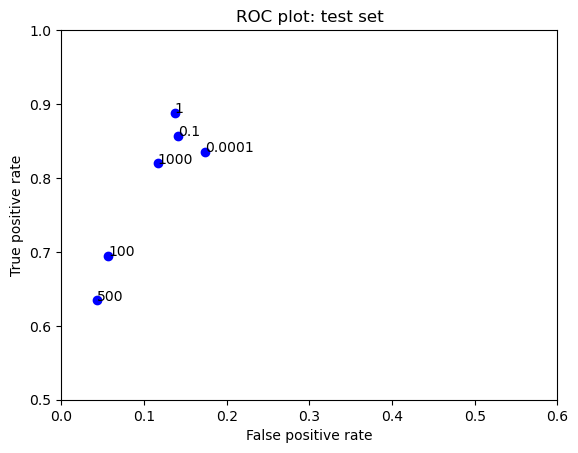

In [34]:
#fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]
fits = [svm1_performance_test,svm2_performance_test,svm3_performance_test,svm4_performance_test,svm5_performance_test,svm6_performance_test]


for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 0.6, 0.5, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [23]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/home/ec2-user/data/moviereviews_test.tsv', my_random_seed=74, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [24]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = ols.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.5596


In [25]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [26]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,1
2,5828_4,1
3,7186_2,1
4,12128_7,0


In [27]:
my_submission.shape

(25000, 2)

In [28]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/home/ec2-user/data/moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation